In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 14,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})
plt.rcParams['xtick.labelsize']=12

In [4]:
map_key = "map_75"

In [5]:
df_tensor_jpeg_map = pd.read_csv("../measurements/tensor_jpeg_pure/map.csv")
# df_tensor_jpeg_resource = pd.read_csv("../measurements/tensor_jpeg/resource.csv")
df_tensor_jpeg_time = pd.read_csv("../measurements/tensor_jpeg_pure/time.csv")

df_frame_jpeg_map = pd.read_csv("../measurements/frame_jpeg/map.csv")
df_frame_jpeg_resource = pd.read_csv("../measurements/frame_jpeg/resource.csv")
df_frame_jpeg_time = pd.read_csv("../measurements/frame_jpeg/time.csv")

df_tensor_ml_map = pd.read_csv("../measurements/tensor_ml/map.csv")
df_tensor_ml_resource = pd.read_csv("../measurements/tensor_ml/resource.csv")
df_tensor_ml_time = pd.read_csv("../measurements/tensor_ml/time.csv")

df_frame_local_map = pd.read_csv("../measurements/frame_local/map.csv")
df_frame_local_resource = pd.read_csv("../measurements/frame_local/resource.csv")
df_frame_local_time = pd.read_csv("../measurements/frame_local/time.csv")


## Map

In [6]:
tensor_jpeg_map_mean =[]
tensor_jpeg_map_std = []
jpeg_groups=df_tensor_jpeg_map.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    tensor_jpeg_map_mean.append(dfg[map_key].mean()*100)
    tensor_jpeg_map_std.append(dfg[map_key].std()*100)
tensor_jpeg_map_mean = np.array(tensor_jpeg_map_mean)
tensor_jpeg_map_std = np.array(tensor_jpeg_map_std)

In [7]:
frame_jpeg_map_mean =[]
frame_jpeg_map_std = []
jpeg_groups=df_frame_jpeg_map.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    frame_jpeg_map_mean.append(dfg[map_key].mean()*100)
    frame_jpeg_map_std.append(dfg[map_key].std()*100)
frame_jpeg_map_mean = np.array(frame_jpeg_map_mean)
frame_jpeg_map_std = np.array(frame_jpeg_map_std)

In [8]:
tensor_ml_map_mean =[]
tensor_ml_map_std = []
jpeg_groups=df_tensor_ml_map.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    tensor_ml_map_mean.append(dfg[map_key].mean()*100)
    tensor_ml_map_std.append(dfg[map_key].std()*100)
tensor_ml_map_mean = np.array(tensor_ml_map_mean)
tensor_ml_map_std = np.array(tensor_ml_map_std)

## Data size

In [9]:
# tensor_jpeg_datasize_mean =[]
# tensor_jpeg_datasize_std = []
# jpeg_groups=df_tensor_jpeg_resource.groupby("jepg_quality")
# for key in jpeg_groups.groups.keys():
#     dfg = jpeg_groups.get_group(key)
#     tensor_jpeg_datasize_mean.append(dfg["data_size_mean"].mean()/1e3)
#     tensor_jpeg_datasize_std.append(dfg["data_size_std"].mean()/1e3)
# tensor_jpeg_datasize_mean =np.array(tensor_jpeg_datasize_mean)
# tensor_jpeg_datasize_std = np.array(tensor_jpeg_datasize_std)

In [10]:
frame_jpeg_datasize_mean =[]
frame_jpeg_datasize_std = []
jpeg_groups=df_frame_jpeg_resource.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    frame_jpeg_datasize_mean.append(dfg["data_size_mean"].mean()/1e3)
    frame_jpeg_datasize_std.append(dfg["data_size_std"].mean()/1e3)
frame_jpeg_datasize_mean =np.array(frame_jpeg_datasize_mean)
frame_jpeg_datasize_std = np.array(frame_jpeg_datasize_std)

In [11]:
tensor_ml_datasize_mean =[]
tensor_ml_datasize_std = []
ml_groups=df_tensor_ml_resource.groupby("jepg_quality")
for key in ml_groups.groups.keys():
    dfg = ml_groups.get_group(key)
    tensor_ml_datasize_mean.append(dfg["data_size_mean"].mean()/1e3)
    tensor_ml_datasize_std.append(dfg["data_size_std"].mean()/1e3)
tensor_ml_datasize_mean =np.array(tensor_ml_datasize_mean)
tensor_ml_datasize_std = np.array(tensor_ml_datasize_std)

## Time

In [12]:
tensor_jpeg_elapsed_mean =[]
tensor_jpeg_network_mean = []
jpeg_groups=df_tensor_jpeg_time.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    tensor_jpeg_elapsed_mean.append(dfg["head_time_mean"].mean()+dfg["encode_time_mean"].mean()+dfg["request_time_mean"].mean())
    tensor_jpeg_network_mean.append(dfg["request_time_mean"].mean()-dfg["decode_time_mean"].mean()-dfg["tail_time_mean"].mean())
tensor_jpeg_elapsed_mean =np.array(tensor_jpeg_elapsed_mean)
tensor_jpeg_network_mean = np.array(tensor_jpeg_network_mean)

In [13]:
frame_jpeg_elapsed_mean =[]
frame_jpeg_network_mean = []
jpeg_groups=df_frame_jpeg_time.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    frame_jpeg_elapsed_mean.append(dfg["encode_time_mean"].mean()+dfg["request_time_mean"].mean())
    frame_jpeg_network_mean.append(dfg["request_time_mean"].mean()-dfg["decode_time_mean"].mean()-dfg["model_time_mean"].mean())
frame_jpeg_elapsed_mean =np.array(frame_jpeg_elapsed_mean)
frame_jpeg_network_mean = np.array(frame_jpeg_network_mean)

In [14]:
tensor_ml_elapsed_mean =[]
tensor_ml_network_mean = []
ml_groups=df_tensor_ml_time.groupby("jepg_quality")
for key in ml_groups.groups.keys():
    dfg = ml_groups.get_group(key)
    tensor_ml_elapsed_mean.append(dfg["head_time_mean"].mean()+dfg["encode_time_mean"].mean()+dfg["request_time_mean"].mean())
    tensor_ml_network_mean.append(dfg["request_time_mean"].mean()-dfg["decode_time_mean"].mean()-dfg["tail_time_mean"].mean())
tensor_ml_elapsed_mean =np.array(tensor_ml_elapsed_mean)
tensor_ml_network_mean = np.array(tensor_ml_network_mean)

## Resource

In [ ]:
# df_tensor_jpeg_resource.head()

,video_name,pruning_thresh,jepg_quality,data_size_mean,data_size_std,cpu_cli_mean,cpu_cli_std,cpu_cli_mem_mean,cpu_cli_mem_std,cuda_cli_mem_mean,cuda_cli_mem_std,cpu_edge_mean,cpu_edge_std,cuda_edge_mean,cuda_edge_std,cpu_edge_mem_mean,cpu_edge_mem_std,cuda_edge_mem_mean,cuda_edge_mem_std
0,b4fe0b47-a7819060,0.05,60,16798.90,3253.248895,83.99176,30.541769,6.52,2.664535e-15,71.7027,0.838913,2.43907,1.110603,3.87249,0.046752,0.000206,0.002031,15.9458,0.524756
1,b4fe0b47-a7819060,0.05,70,19022.49,3489.355352,80.98018,21.911014,6.52,2.664535e-15,71.6774,0.749094,2.14151,0.269614,3.84627,0.033564,0.000008,0.000018,15.8765,0.489984
2,b4fe0b47-a7819060,0.05,80,22861.48,3434.890049,81.84219,22.704217,6.52,2.664535e-15,71.7194,0.725338,2.18575,0.268960,3.84023,0.032622,0.000005,0.000014,15.8634,0.419453
3,b4fe0b47-a7819060,0.05,90,30951.10,3291.660300,81.81858,20.551518,6.52,2.664535e-15,71.6334,0.530163,2.42032,1.138162,3.84033,0.029244,0.000007,0.000017,15.8689,0.515437
4,b4fe0b47-a7819060,0.05,100,67155.70,5259.098633,83.54772,22.777604,6.52,2.664535e-15,71.7138,0.703310,2.52530,0.377209,3.84139,0.031984,0.000004,0.000012,15.8508,0.436712


In [15]:
# tensor_jpeg_cpuCli_mean =[]
# tensor_jpeg_cpuCli_std = []
# jpeg_groups=df_tensor_jpeg_resource.groupby("jepg_quality")
# for key in jpeg_groups.groups.keys():
#     dfg = jpeg_groups.get_group(key)
#     tensor_jpeg_cpuCli_mean.append(dfg["cpu_cli_mean"].mean())
#     tensor_jpeg_cpuCli_std.append(dfg["cpu_cli_std"].mean())
# tensor_jpeg_cpuCli_mean =np.array(tensor_jpeg_cpuCli_mean)
# tensor_jpeg_cpuCli_std = np.array(tensor_jpeg_cpuCli_std)

# tensor_jpeg_cpuEdge_mean =[]
# tensor_jpeg_cpuEdge_std = []
# jpeg_groups=df_tensor_jpeg_resource.groupby("jepg_quality")
# for key in jpeg_groups.groups.keys():
#     dfg = jpeg_groups.get_group(key)
#     tensor_jpeg_cpuEdge_mean.append(dfg["cpu_edge_mean"].mean())
#     tensor_jpeg_cpuEdge_std.append(dfg["cpu_edge_std"].mean())
# tensor_jpeg_cpuEdge_mean =np.array(tensor_jpeg_cpuEdge_mean)
# tensor_jpeg_cpuEdge_std = np.array(tensor_jpeg_cpuEdge_std)

# tensor_jpeg_cudaEdge_mean =[]
# tensor_jpeg_cudaEdge_std = []
# jpeg_groups=df_tensor_jpeg_resource.groupby("jepg_quality")
# for key in jpeg_groups.groups.keys():
#     dfg = jpeg_groups.get_group(key)
#     tensor_jpeg_cudaEdge_mean.append(dfg["cuda_edge_mean"].mean())
#     tensor_jpeg_cudaEdge_std.append(dfg["cuda_edge_std"].mean())
# tensor_jpeg_cudaEdge_mean =np.array(tensor_jpeg_cudaEdge_mean)
# tensor_jpeg_cudaEdge_std = np.array(tensor_jpeg_cudaEdge_std)

In [17]:
frame_jpeg_cpuCli_mean =[]
frame_jpeg_cpuCli_std = []
jpeg_groups=df_frame_jpeg_resource.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    frame_jpeg_cpuCli_mean.append(dfg["cpu_cli_mean"].mean())
    frame_jpeg_cpuCli_std.append(dfg["cpu_cli_std"].mean())
frame_jpeg_cpuCli_mean =np.array(frame_jpeg_cpuCli_mean)
frame_jpeg_cpuCli_std = np.array(frame_jpeg_cpuCli_std)

frame_jpeg_cpuEdge_mean =[]
frame_jpeg_cpuEdge_std = []
jpeg_groups=df_frame_jpeg_resource.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    frame_jpeg_cpuEdge_mean.append(dfg["cpu_edge_mean"].mean())
    frame_jpeg_cpuEdge_std.append(dfg["cpu_edge_std"].mean())
frame_jpeg_cpuEdge_mean =np.array(frame_jpeg_cpuEdge_mean)
frame_jpeg_cpuEdge_std = np.array(frame_jpeg_cpuEdge_std)

frame_jpeg_cudaEdge_mean =[]
frame_jpeg_cudaEdge_std = []
jpeg_groups=df_frame_jpeg_resource.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    frame_jpeg_cudaEdge_mean.append(dfg["cuda_edge_mean"].mean())
    frame_jpeg_cudaEdge_std.append(dfg["cuda_edge_std"].mean())
frame_jpeg_cudaEdge_mean =np.array(frame_jpeg_cudaEdge_mean)
frame_jpeg_cudaEdge_std = np.array(frame_jpeg_cudaEdge_std)

In [18]:
tensor_ml_cpuCli_mean =[]
tensor_ml_cpuCli_std = []
ml_groups=df_tensor_ml_resource.groupby("jepg_quality")
for key in ml_groups.groups.keys():
    dfg = ml_groups.get_group(key)
    tensor_ml_cpuCli_mean.append(dfg["cpu_cli_mean"].mean())
    tensor_ml_cpuCli_std.append(dfg["cpu_cli_std"].mean())
tensor_ml_cpuCli_mean =np.array(tensor_ml_cpuCli_mean)
tensor_ml_cpuCli_std = np.array(tensor_ml_cpuCli_std)

tensor_ml_cpuEdge_mean =[]
tensor_ml_cpuEdge_std = []
ml_groups=df_tensor_ml_resource.groupby("jepg_quality")
for key in ml_groups.groups.keys():
    dfg = ml_groups.get_group(key)
    tensor_ml_cpuEdge_mean.append(dfg["cpu_edge_mean"].mean())
    tensor_ml_cpuEdge_std.append(dfg["cpu_edge_std"].mean())
tensor_ml_cpuEdge_mean =np.array(tensor_ml_cpuEdge_mean)
tensor_ml_cpuEdge_std = np.array(tensor_ml_cpuEdge_std)

tensor_ml_cudaEdge_mean =[]
tensor_ml_cudaEdge_std = []
ml_groups=df_tensor_ml_resource.groupby("jepg_quality")
for key in ml_groups.groups.keys():
    dfg = ml_groups.get_group(key)
    tensor_ml_cudaEdge_mean.append(dfg["cuda_edge_mean"].mean())
    tensor_ml_cudaEdge_std.append(dfg["cuda_edge_std"].mean())
tensor_ml_cudaEdge_mean =np.array(tensor_ml_cudaEdge_mean)
tensor_ml_cudaEdge_std = np.array(tensor_ml_cudaEdge_std)

In [19]:
# tensor_jpeg_cpumemCli_mean =[]
# tensor_jpeg_cpumemCli_std = []
# jpeg_groups=df_tensor_jpeg_resource.groupby("jepg_quality")
# for key in jpeg_groups.groups.keys():
#     dfg = jpeg_groups.get_group(key)
#     tensor_jpeg_cpumemCli_mean.append(dfg["cpu_cli_mem_mean"].mean())
#     tensor_jpeg_cpumemCli_std.append(dfg["cpu_cli_mem_std"].mean())
# tensor_jpeg_cpumemCli_mean =np.array(tensor_jpeg_cpumemCli_mean)
# tensor_jpeg_cpumemCli_std = np.array(tensor_jpeg_cpumemCli_std)

# tensor_jpeg_cpumemEdge_mean =[]
# tensor_jpeg_cpumemEdge_std = []
# jpeg_groups=df_tensor_jpeg_resource.groupby("jepg_quality")
# for key in jpeg_groups.groups.keys():
#     dfg = jpeg_groups.get_group(key)
#     tensor_jpeg_cpumemEdge_mean.append(dfg["cpu_edge_mem_mean"].mean())
#     tensor_jpeg_cpumemEdge_std.append(dfg["cpu_edge_mem_std"].mean())
# tensor_jpeg_cpumemEdge_mean =np.array(tensor_jpeg_cpumemEdge_mean)
# tensor_jpeg_cpumemEdge_std = np.array(tensor_jpeg_cpumemEdge_std)

# tensor_jpeg_cudamemCli_mean =[]
# tensor_jpeg_cudamemCli_std = []
# jpeg_groups=df_tensor_jpeg_resource.groupby("jepg_quality")
# for key in jpeg_groups.groups.keys():
#     dfg = jpeg_groups.get_group(key)
#     tensor_jpeg_cudamemCli_mean.append(dfg["cuda_cli_mem_mean"].mean())
#     tensor_jpeg_cudamemCli_std.append(dfg["cuda_cli_mem_std"].mean())
# tensor_jpeg_cudamemCli_mean =np.array(tensor_jpeg_cudamemCli_mean)
# tensor_jpeg_cudamemCli_std = np.array(tensor_jpeg_cudamemCli_std)

# tensor_jpeg_cudamemEdge_mean =[]
# tensor_jpeg_cudamemEdge_std = []
# jpeg_groups=df_tensor_jpeg_resource.groupby("jepg_quality")
# for key in jpeg_groups.groups.keys():
#     dfg = jpeg_groups.get_group(key)
#     tensor_jpeg_cudamemEdge_mean.append(dfg["cuda_edge_mem_mean"].mean())
#     tensor_jpeg_cudamemEdge_std.append(dfg["cuda_edge_mem_std"].mean())
# tensor_jpeg_cudamemEdge_mean =np.array(tensor_jpeg_cudamemEdge_mean)
# tensor_jpeg_cudamemEdge_std = np.array(tensor_jpeg_cudamemEdge_std)

In [20]:
tensor_ml_cpumemCli_mean =[]
tensor_ml_cpumemCli_std = []
ml_groups=df_tensor_ml_resource.groupby("jepg_quality")
for key in ml_groups.groups.keys():
    dfg = ml_groups.get_group(key)
    tensor_ml_cpumemCli_mean.append(dfg["cpu_cli_mem_mean"].mean())
    tensor_ml_cpumemCli_std.append(dfg["cpu_cli_mem_std"].mean())
tensor_ml_cpumemCli_mean =np.array(tensor_ml_cpumemCli_mean)
tensor_ml_cpumemCli_std = np.array(tensor_ml_cpumemCli_std)

tensor_ml_cpumemEdge_mean =[]
tensor_ml_cpumemEdge_std = []
ml_groups=df_tensor_ml_resource.groupby("jepg_quality")
for key in ml_groups.groups.keys():
    dfg = ml_groups.get_group(key)
    tensor_ml_cpumemEdge_mean.append(dfg["cpu_edge_mem_mean"].mean())
    tensor_ml_cpumemEdge_std.append(dfg["cpu_edge_mem_std"].mean())
tensor_ml_cpumemEdge_mean =np.array(tensor_ml_cpumemEdge_mean)
tensor_ml_cpumemEdge_std = np.array(tensor_ml_cpumemEdge_std)

tensor_ml_cudamemCli_mean =[]
tensor_ml_cudamemCli_std = []
ml_groups=df_tensor_ml_resource.groupby("jepg_quality")
for key in ml_groups.groups.keys():
    dfg = ml_groups.get_group(key)
    tensor_ml_cudamemCli_mean.append(dfg["cuda_cli_mem_mean"].mean())
    tensor_ml_cudamemCli_std.append(dfg["cuda_cli_mem_std"].mean())
tensor_ml_cudamemCli_mean =np.array(tensor_ml_cudamemCli_mean)
tensor_ml_cudamemCli_std = np.array(tensor_ml_cudamemCli_std)

tensor_ml_cudamemEdge_mean =[]
tensor_ml_cudamemEdge_std = []
ml_groups=df_tensor_ml_resource.groupby("jepg_quality")
for key in ml_groups.groups.keys():
    dfg = ml_groups.get_group(key)
    tensor_ml_cudamemEdge_mean.append(dfg["cuda_edge_mem_mean"].mean())
    tensor_ml_cudamemEdge_std.append(dfg["cuda_edge_mem_std"].mean())
tensor_ml_cudamemEdge_mean =np.array(tensor_ml_cudamemEdge_mean)
tensor_ml_cudamemEdge_std = np.array(tensor_ml_cudamemEdge_std)

In [21]:
frame_jpeg_cpumemCli_mean =[]
frame_jpeg_cpumemCli_std = []
jpeg_groups=df_frame_jpeg_resource.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    frame_jpeg_cpumemCli_mean.append(dfg["cpu_cli_mem_mean"].mean())
    frame_jpeg_cpumemCli_std.append(dfg["cpu_cli_mem_std"].mean())
frame_jpeg_cpumemCli_mean =np.array(frame_jpeg_cpumemCli_mean)
frame_jpeg_cpumemCli_std = np.array(frame_jpeg_cpumemCli_std)

frame_jpeg_cpumemEdge_mean =[]
frame_jpeg_cpumemEdge_std = []
jpeg_groups=df_frame_jpeg_resource.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    frame_jpeg_cpumemEdge_mean.append(dfg["cpu_edge_mem_mean"].mean())
    frame_jpeg_cpumemEdge_std.append(dfg["cpu_edge_mem_std"].mean())
frame_jpeg_cpumemEdge_mean =np.array(frame_jpeg_cpumemEdge_mean)
frame_jpeg_cpumemEdge_std = np.array(frame_jpeg_cpumemEdge_std)

frame_jpeg_cudamemEdge_mean =[]
frame_jpeg_cudamemEdge_std = []
jpeg_groups=df_frame_jpeg_resource.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    frame_jpeg_cudamemEdge_mean.append(dfg["cuda_edge_mem_mean"].mean())
    frame_jpeg_cudamemEdge_std.append(dfg["cuda_edge_mem_std"].mean())
frame_jpeg_cudamemEdge_mean =np.array(frame_jpeg_cudamemEdge_mean)
frame_jpeg_cudamemEdge_std = np.array(frame_jpeg_cudamemEdge_std)

## Plots

In [22]:
df_frame_local_resource.head()

,video_name,cpu_cli_mean,cpu_cli_std,cpu_cli_mem_mean,cpu_cli_mem_std,cuda_cli_mem_mean,cuda_cli_mem_std
0,b4fe0b47-a7819060,7.93958,0.956117,6.4402,1.989975e-03,82.6277,1.598305
1,b5fa32f1-4e9c7d32,7.99753,0.304644,6.4400,8.881784e-16,82.4468,1.306912
2,b4c0a877-66fc6239,7.77345,0.455761,6.4598,1.970075e-01,82.6132,1.483451
3,b49a1b50-186fb520,7.24375,0.706075,6.4449,4.875438e-02,82.9852,1.994423
4,b610204c-e3c8c65f,7.86065,0.329965,6.4400,8.881784e-16,82.9594,1.729996


/tmp/ipykernel_2997393/4189002223.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


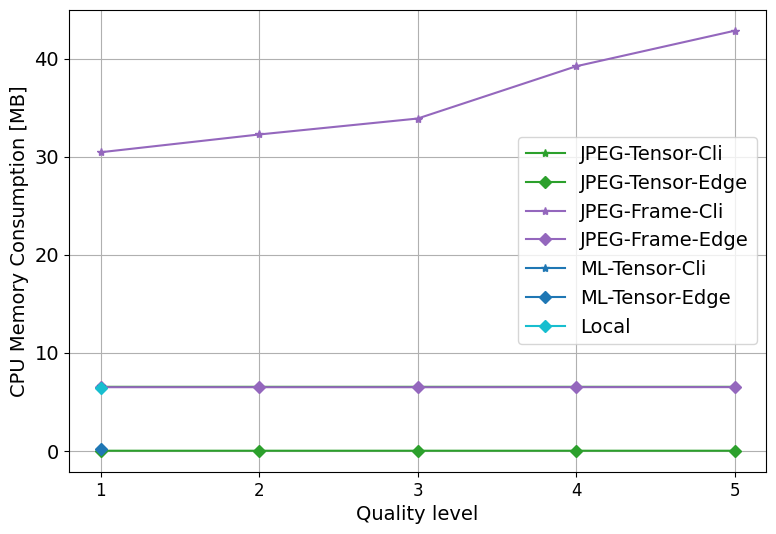

In [ ]:
fig, ax1 = plt.subplots(figsize=(9, 6))

x_real = np.arange(1,6)

ax1.plot(x_real,tensor_jpeg_cpumemCli_mean, "*-", label="JPEG-Tensor-Cli"  ,color="tab:green" )
ax1.plot(x_real,tensor_jpeg_cpumemEdge_mean, "D-", label="JPEG-Tensor-Edge"  ,color="tab:green" )

ax1.plot(x_real,frame_jpeg_cpumemCli_mean, "*-", label="JPEG-Frame-Cli"  ,color="tab:purple" )
ax1.plot(x_real,frame_jpeg_cpumemEdge_mean, "D-", label="JPEG-Frame-Edge"  ,color="tab:purple" )

ax1.plot(1,tensor_ml_cpumemCli_mean, "*-", label="ML-Tensor-Cli"  ,color="tab:blue" )
ax1.plot(1,tensor_ml_cpumemEdge_mean, "D-", label="ML-Tensor-Edge"  ,color="tab:blue" )

ax1.plot(1,df_frame_local_resource["cpu_cli_mem_mean"].mean(), "D-", label="Local"  ,color="tab:cyan" )

ax1.set_ylabel("CPU Memory Consumption [MB]")
ax1.set_xlabel('Quality level')
# ax1.set_yscale("log")
ax1.set_xticks(x_real, x_real)
ax1.legend()
ax1.autoscale(axis="x",tight=False)
ax1.grid()
fig.show()

/tmp/ipykernel_2997393/1584064057.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


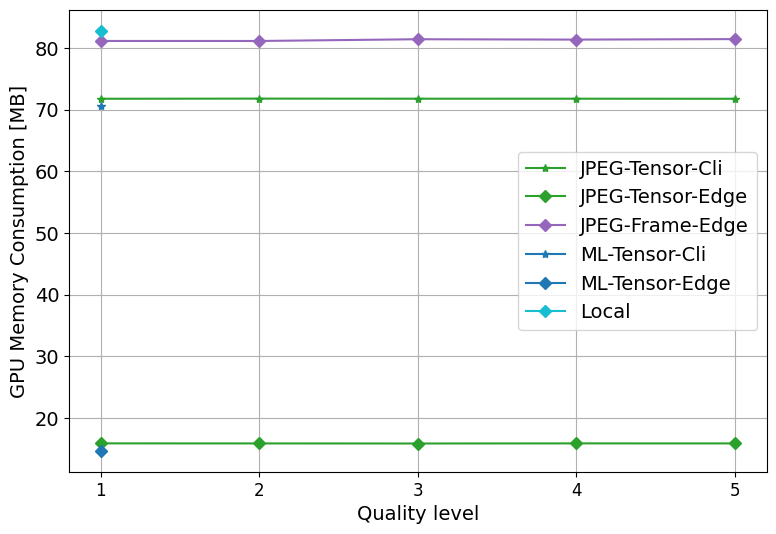

In [ ]:
fig, ax1 = plt.subplots(figsize=(9, 6))

x_real = np.arange(1,6)

ax1.plot(x_real,tensor_jpeg_cudamemCli_mean, "*-", label="JPEG-Tensor-Cli"  ,color="tab:green" )
ax1.plot(x_real,tensor_jpeg_cudamemEdge_mean, "D-", label="JPEG-Tensor-Edge"  ,color="tab:green" )

# ax1.plot(x_real,frame_jpeg_cudamemCli_mean, "*-", label="JPEG-Frame-Cli"  ,color="tab:purple" )
ax1.plot(x_real,frame_jpeg_cudamemEdge_mean, "D-", label="JPEG-Frame-Edge"  ,color="tab:purple" )

ax1.plot(1,tensor_ml_cudamemCli_mean, "*-", label="ML-Tensor-Cli"  ,color="tab:blue" )
ax1.plot(1,tensor_ml_cudamemEdge_mean, "D-", label="ML-Tensor-Edge"  ,color="tab:blue" )

ax1.plot(1,df_frame_local_resource["cuda_cli_mem_mean"].mean(), "D-", label="Local"  ,color="tab:cyan" )

ax1.set_ylabel("GPU Memory Consumption [MB]")
ax1.set_xlabel('Quality level')
# ax1.set_yscale("log")
ax1.set_xticks(x_real, x_real)
ax1.legend()
ax1.autoscale(axis="x",tight=False)
ax1.grid()
fig.show()

/tmp/ipykernel_2997393/2693806022.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


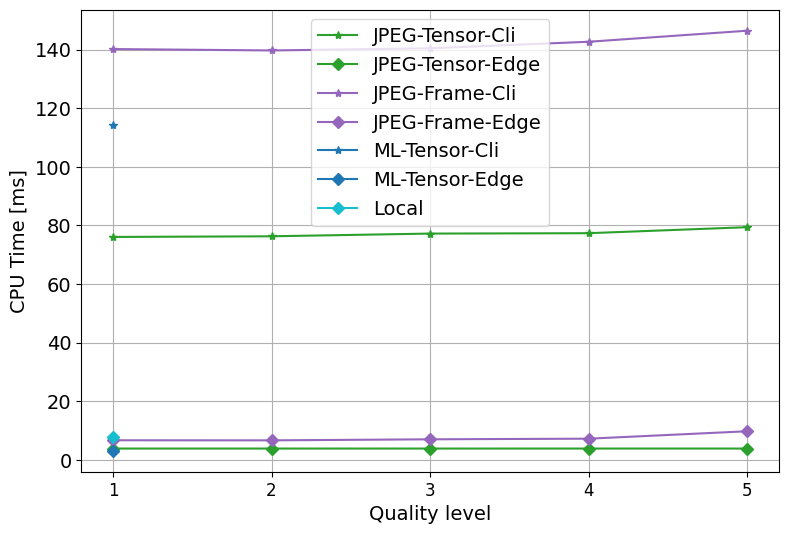

In [ ]:
fig, ax1 = plt.subplots(figsize=(9, 6))

x_real = np.arange(1,6)

ax1.plot(x_real,tensor_jpeg_cpuCli_mean, "*-", label="JPEG-Tensor-Cli"  ,color="tab:green" )
ax1.plot(x_real,tensor_jpeg_cpuEdge_mean, "D-", label="JPEG-Tensor-Edge"  ,color="tab:green" )

ax1.plot(x_real,frame_jpeg_cpuCli_mean, "*-", label="JPEG-Frame-Cli"  ,color="tab:purple" )
ax1.plot(x_real,frame_jpeg_cpuEdge_mean, "D-", label="JPEG-Frame-Edge"  ,color="tab:purple" )

ax1.plot(1,tensor_ml_cpuCli_mean, "*-", label="ML-Tensor-Cli"  ,color="tab:blue" )
ax1.plot(1,tensor_ml_cpuEdge_mean, "D-", label="ML-Tensor-Edge"  ,color="tab:blue" )

ax1.plot(1,df_frame_local_resource["cpu_cli_mean"].mean(), "D-", label="Local"  ,color="tab:cyan" )

ax1.set_ylabel("CPU Time [ms]")
ax1.set_xlabel('Quality level')
# ax1.set_yscale("log")
ax1.set_xticks(x_real, x_real)
ax1.legend()
ax1.autoscale(axis="x",tight=False)
ax1.grid()
fig.show()

/tmp/ipykernel_2997393/2954494466.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


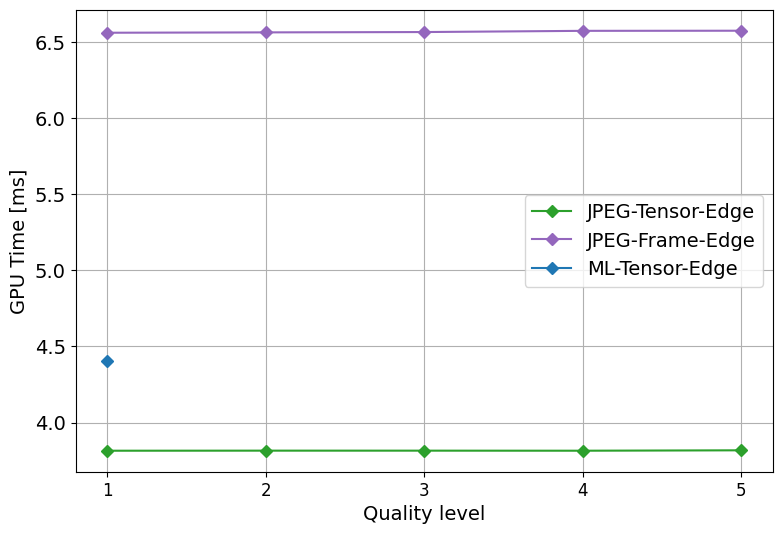

In [ ]:
fig, ax1 = plt.subplots(figsize=(9, 6))

x_real = np.arange(1,6)

# ax1.plot(x_real,tensor_jpeg_cudaCli_mean, "*-", label="JPEG-Tensor-Cli"  ,color="tab:green" )
ax1.plot(x_real,tensor_jpeg_cudaEdge_mean, "D-", label="JPEG-Tensor-Edge"  ,color="tab:green" )

# ax1.plot(x_real,frame_jpeg_cpuCli_mean, "*-", label="JPEG-Frame-Cli"  ,color="tab:purple" )
ax1.plot(x_real,frame_jpeg_cudaEdge_mean, "D-", label="JPEG-Frame-Edge"  ,color="tab:purple" )

# ax1.plot(1,tensor_ml_cpuCli_mean, "*-", label="ML-Tensor-Cli"  ,color="tab:blue" )
ax1.plot(1,tensor_ml_cudaEdge_mean, "D-", label="ML-Tensor-Edge"  ,color="tab:blue" )

ax1.set_ylabel("GPU Time [ms]")
ax1.set_xlabel('Quality level')
# ax1.set_yscale("log")
ax1.set_xticks(x_real, x_real)
ax1.legend()
ax1.autoscale(axis="x",tight=False)
ax1.grid()
fig.show()

/tmp/ipykernel_18711/1414212641.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


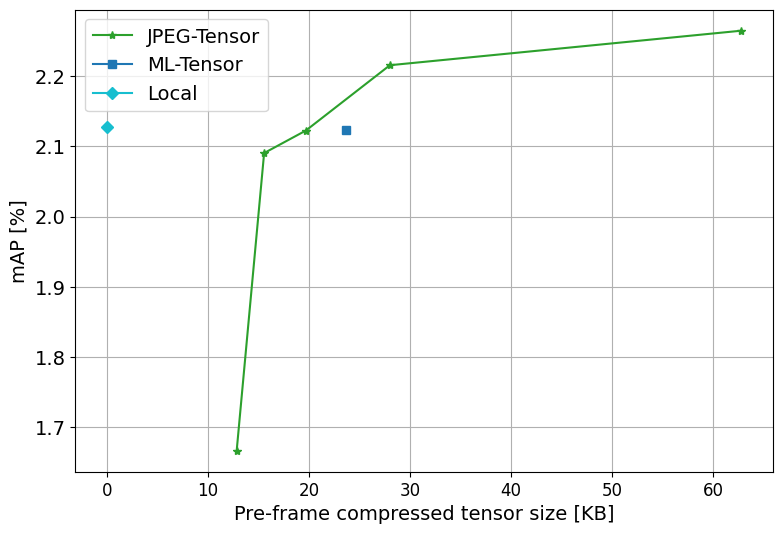

In [ ]:
fig, ax1 = plt.subplots(figsize=(9, 6))

x_real = np.arange(1,6)


ax1.plot(tensor_jpeg_datasize_mean,tensor_jpeg_map_mean, "*-", label="JPEG-Tensor"  ,color="tab:green" )
# ax1.plot(frame_jpeg_datasize_mean,frame_jpeg_map_mean, "^-", label="JPEG-Frame"  ,color="tab:purple" )
ax1.plot(tensor_ml_datasize_mean,tensor_ml_map_mean, "s-", label="ML-Tensor"  ,color="tab:blue" )
ax1.plot(0,df_frame_local_map[map_key].mean()*100, "D-", label="Local"  ,color="tab:cyan" )

ax1.set_ylabel("mAP [%]")
ax1.set_xlabel('Pre-frame compressed tensor size [KB]')
# ax1.set_xticks(x_real, x_real)
ax1.legend()
ax1.autoscale(axis="x",tight=False)
# ax1.set_yscale("log")
# ax1.set_ylim([1,500])
# plt.legend((p1[0], p2[0]), ('boys', 'girls'), loc= "lower center")
# lgd = ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=3,columnspacing=0.7, fancybox=True, shadow=True)
ax1.grid()
fig.show()

/tmp/ipykernel_20283/580035610.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


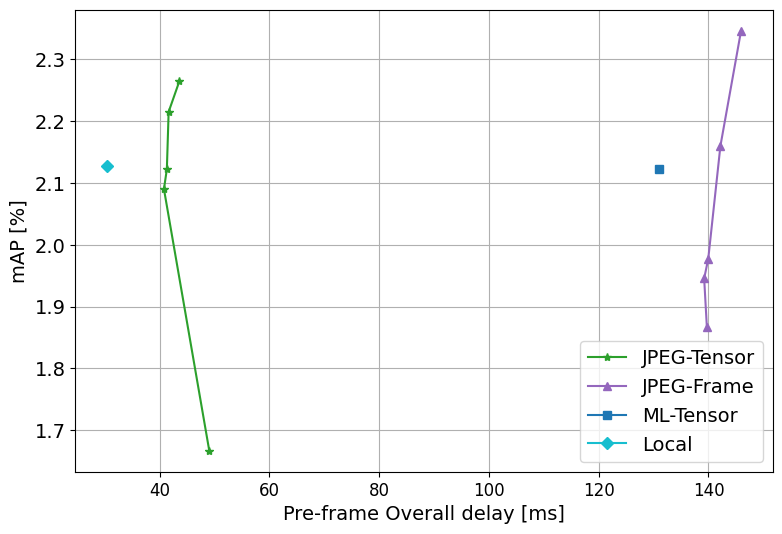

In [23]:
fig, ax1 = plt.subplots(figsize=(9, 6))

x_real = np.arange(1,6)


ax1.plot(tensor_jpeg_elapsed_mean,tensor_jpeg_map_mean, "*-", label="JPEG-Tensor"  ,color="tab:green" )
ax1.plot(frame_jpeg_elapsed_mean,frame_jpeg_map_mean, "^-", label="JPEG-Frame"  ,color="tab:purple" )
ax1.plot(tensor_ml_elapsed_mean,tensor_ml_map_mean, "s-", label="ML-Tensor"  ,color="tab:blue" )
ax1.plot(df_frame_local_time["model_time_mean"].mean(),df_frame_local_map[map_key].mean()*100, "D-", label="Local"  ,color="tab:cyan" )

ax1.set_ylabel("mAP [%]")
ax1.set_xlabel('Pre-frame Overall delay [ms]')
# ax1.set_xticks(x_real, x_real)
ax1.legend()
ax1.autoscale(axis="x",tight=False)
# ax1.set_yscale("log")
# ax1.set_ylim([1,500])
# plt.legend((p1[0], p2[0]), ('boys', 'girls'), loc= "lower center")
# lgd = ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=3,columnspacing=0.7, fancybox=True, shadow=True)
ax1.grid()
fig.show()